Price            close        high         low        open    volume  change  \
Ticker            msft        msft        msft        msft      msft           
Date                                                                           
2025-09-29  514.599976  516.849976  508.880005  511.500000  17617800  0.0061   
2025-09-30  517.950012  518.159973  509.660004  513.239990  19728200  0.0065   
2025-10-01  519.710022  520.510010  511.690002  514.799988  22632300  0.0034   
2025-10-02  515.739990  521.599976  510.679993  517.640015  21222900 -0.0076   
2025-10-03  517.349976  520.489990  515.000000  517.099976  15104200  0.0031   

Price      instant_return  
Ticker                     
Date                       
2025-09-29         0.0061  
2025-09-30         0.0065  
2025-10-01         0.0034  
2025-10-02        -0.0077  
2025-10-03         0.0031  


/var/folders/w0/pnd9y36s1vx9kd4_5nhlt3mm0000gn/T/ipykernel_95367/2592036054.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(self.symbol, start=self.start, end=self.end, progress=False)


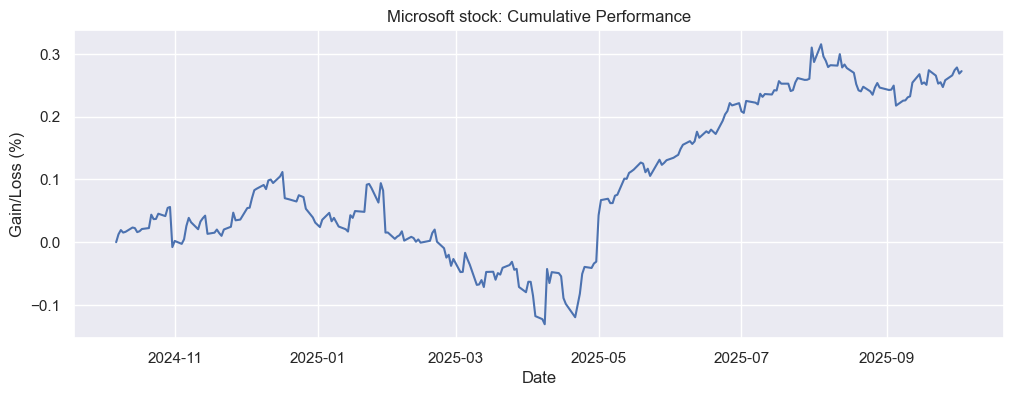

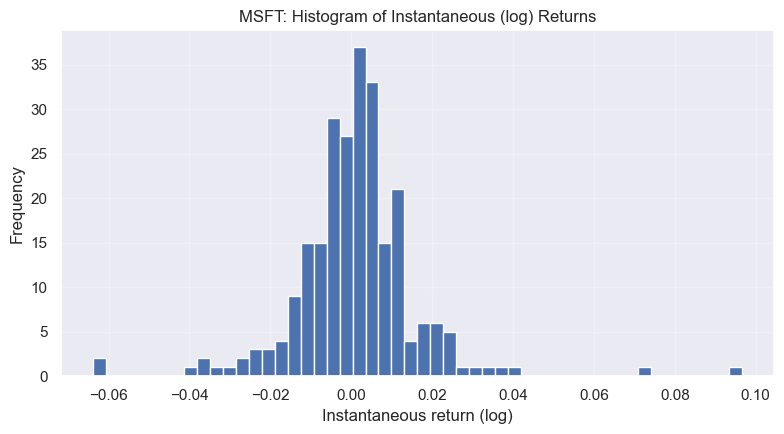

In [12]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
import seaborn as sb # optional to set plot theme
sb.set_theme() # optional to set plot theme
import yfinance as yf 

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())
# ⬆️ This is setting dates. Considering today's date, the start is 365 days ago, and default date, of course, today.

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data() #to download the data


    def get_data(self):
        data = yf.download(self.symbol, start=self.start, end=self.end, progress=False)
       # ⬆️ Downloads the stock data from yahoo finance between your start and end dates. It includes columns like Open, High, Low, Close, Volume
      
        if data.empty:
            raise ValueError(f"No data for {self.symbol} between {self.start} and {self.end}") # To check if the data is empty... f it is, stop and show an error message
        data.index = pd.to_datetime(data.index) #make sure the index is a real date format
        data = data.rename(columns=str.lower) #rename columns to lowercase for consistency
        self.calc_returns(data) # Calls another method ( its below) to calculate daily returns and add those columns to the table.
        return data #sends the final df to be stored in self.data


    
    def calc_returns(self, df):
        df["change"] = df["close"].pct_change().round(4)   # change = percentual variation close to close 
        df["instant_return"] = np.log(df["close"]).diff().round(4) # instantaneous (log) return

    
    def plot_return_dist(self):
        x = self.data["instant_return"].dropna()
        plt.figure(figsize=(8, 4.5))
        plt.hist(x, bins=50, edgecolor="white")
        plt.title(f"{self.symbol}: Histogram of Instantaneous (log) Returns")
        plt.xlabel("Instantaneous return (log)")
        plt.ylabel("Frequency")
        plt.grid(alpha=0.25)
        plt.tight_layout()
        plt.show()


    def plot_performance(self):
        """method that plots stock object performance as percent """
        close = self.data["close"]
        perf = close / close.iloc[0] - 1.0  
        plt.figure(figsize=(12, 4))
        plt.plot(perf.index, perf.values)
        plt.title(f"{self.symbol}: Cumulative Performance")
        plt.xlabel("Date")
        plt.ylabel("Gain/Loss (%)")
        plt.grid(True)
        plt.show()
                      
def main():
    # uncomment (remove pass) code below to test
    test = Stock(symbol="MSFT")  # optionally test custom data range e.g., start="2023-01-01"
    print(test.data.tail())
    test.plot_performance()
    test.plot_return_dist()

if __name__ == '__main__':
    main() 